<h2> Step 1 : Loading Dependencies </h2>

In [ ]:
library(tidyr)
library(readxl)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<b> ACTION STEPS : </b></br>
1) Load Dependencies </br>
2) Load Datasets </br>
3) Create Desired student file that incorporates informations about test scores, school information, attendance, and teacher's lesson completion rate.</br>
4) Reshape "Pupil Score" file so that each student has only one row, with different columns for their scores in math, fluency, and Kiswahili </br>
5) Merge the reshaped "Pupil scores" file with "Pupil attendance" to add attendance information for each pupil</br>
6) Merge the above result withe "School Information" to include school level data viz region,province, and tutoring program status </br>
7) Merge the teacher's lesson completion rate from the "Lesson completion" file Since this data is at the teacher level, and assuming that each grade in a school is taught by a unique teacher (as inferred from the data structure), we will merge on school_id and grade. </br>




<h2> STEP 2 : LOADINIG DATASETS
</h2>

In [ ]:
Lesson_completion <- read_excel('/content/Lesson completion.xlsx')
head(Lesson_completion, 5)

school_id,teacher_id,grade,lesson_completion_rate
<dbl>,<dbl>,<chr>,<dbl>
416,505,Grade 1,0.5684008
416,202,Grade 2,0.6806084
416,124,Grade 3,0.2504604
416,516,Grade 4,0.3591549
416,145,Grade 5,0.3967611


In [ ]:
pupil_attendance <- read_excel("/content/Pupil attendance.xlsx")
head(pupil_attendance, 5)

school_id,pupil_id,grade,attendance_records,present_records
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
35175,1,Grade 1,91,69
40580,7,Grade 2,92,86
9342,8,Grade 5,43,39
858450,10,Grade 5,86,62
792,13,Grade 3,104,81


In [ ]:
school_information <- read_excel("/content/School_information.xlsx")
head(school_information)

region,province,school_id,tutoring_program
<chr>,<chr>,<dbl>,<chr>
Mombasa,Coast,136992,No
Kilifi,Coast,687400,Yes
Mombasa,Coast,609982,Yes
Eastern,Eastern,223941,No
Isiolo,Eastern,34092,No
Isiolo,Eastern,46684,No


In [ ]:
pupil_scores <- read_excel("/content/Pupil scores.xlsx")
head(pupil_scores)

school_id,pupil_id,grade,subject,score
<dbl>,<dbl>,<chr>,<chr>,<dbl>
35175,1,Grade 1,Fluency,65.0000000
35175,1,Grade 1,Kiswahili,0.9428571
35175,1,Grade 1,Math,1.0000000
40580,7,Grade 2,Math,0.9333333
40580,7,Grade 2,Kiswahili,0.9428571
40580,7,Grade 2,Fluency,117.0000000


<h2> Step 3 Reshape the "Pupil scores" data </h2>

In [ ]:
pupil_scores_wide <- pupil_scores %>%
  pivot_wider(names_from = subject, values_from = score) %>%
  rename(Math = `Math`, Fluency = `Fluency`, Kiswahili = `Kiswahili`)

<HP> We have successfully converted or reshaped unique items in subject columns to an entirely new columns. This is called pivotting of columns

In [ ]:
head(pupil_scores_wide, 5)

school_id,pupil_id,grade,Fluency,Kiswahili,Math
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000
40580,7,Grade 2,117,0.9428571,0.9333333
9342,8,Grade 5,144,0.8500000,0.7000000
858450,10,Grade 5,211,1.0000000,0.7200000
792,13,Grade 3,221,0.8571429,0.9666666


<h2> Step 4: Merging with "Pupil attendance" </h2>

In [ ]:
pupil_combined <- pupil_scores_wide %>%
  left_join(pupil_attendance, by = c("school_id", "pupil_id", "grade"))


Merging the pupil attendance table with the reshaped data using a left join, on their similar columns

In [ ]:
head ( pupil_combined, 5)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69
40580,7,Grade 2,117,0.9428571,0.9333333,92,86
9342,8,Grade 5,144,0.8500000,0.7000000,43,39
858450,10,Grade 5,211,1.0000000,0.7200000,86,62
792,13,Grade 3,221,0.8571429,0.9666666,104,81


<h2> Step 5: Merge with "School information"</h2>

In [ ]:
pupil_school_combined <- pupil_combined %>%
  left_join(school_information, by = "school_id")


In [ ]:
head (pupil_school_combined, 5)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69,Tana river,Coast,No
40580,7,Grade 2,117,0.9428571,0.9333333,92,86,Kisumu,Nyanza,No
9342,8,Grade 5,144,0.8500000,0.7000000,43,39,Nairobi,Nairobi,No
858450,10,Grade 5,211,1.0000000,0.7200000,86,62,Kisumu,Nyanza,Yes
792,13,Grade 3,221,0.8571429,0.9666666,104,81,Siaya,Nyanza,No


# Step 6: Merge with "Lesson completion"

In [ ]:
final_student_level_df <- pupil_school_combined %>%
  left_join(Lesson_completion %>% select(-teacher_id), by = c("school_id", "grade"))


In [ ]:
head(final_student_level_df, 5)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,lesson_completion_rate
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69,Tana river,Coast,No,0.6878613
40580,7,Grade 2,117,0.9428571,0.9333333,92,86,Kisumu,Nyanza,No,0.8307985
9342,8,Grade 5,144,0.8500000,0.7000000,43,39,Nairobi,Nairobi,No,0.8097166
858450,10,Grade 5,211,1.0000000,0.7200000,86,62,Kisumu,Nyanza,Yes,0.4430894
792,13,Grade 3,221,0.8571429,0.9666666,104,81,Siaya,Nyanza,No,0.8821363


In [ ]:
final_student_level_df

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,lesson_completion_rate
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
35175,1,Grade 1,65,0.94285715,1.0000000,91,69,Tana river,Coast,No,0.6878613
40580,7,Grade 2,117,0.94285715,0.9333333,92,86,Kisumu,Nyanza,No,0.8307985
9342,8,Grade 5,144,0.85000002,0.7000000,43,39,Nairobi,Nairobi,No,0.8097166
858450,10,Grade 5,211,1.00000000,0.7200000,86,62,Kisumu,Nyanza,Yes,0.4430894
792,13,Grade 3,221,0.85714287,0.9666666,104,81,Siaya,Nyanza,No,0.8821363
324884,14,Grade 4,267,0.92057300,0.9000000,90,67,Bungoma,Western,Yes,0.2457627
230373,16,Grade 3,143,1.00000000,0.7203071,81,65,Mombasa,Coast,Yes,0.7744681
958934,18,Grade 4,0,0.09935214,0.1600000,90,80,Mombasa,Coast,Yes,0.3750000
359640,27,Grade 3,130,1.00000000,0.9189060,97,77,Kiambu,Central,Yes,0.5672192


In [ ]:
#install.packages("writexl")
library(writexl)
write_xlsx(final_student_level_df, "final_student_level_data.xlsx")

<h1> Step 2: Calculating KPIs  </h2>

To calculate the KPI "Percent Pupils Present" we have to calculate the KPI for all pupils at once to find the network-level average and then calculate it for each school to find the school-level averages. This will help us in understanding how the interpretation of the KPI changes based on the aggregation level.

In [ ]:
head(pupil_attendance, 5)

school_id,pupil_id,grade,attendance_records,present_records
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
35175,1,Grade 1,91,69
40580,7,Grade 2,92,86
9342,8,Grade 5,43,39
858450,10,Grade 5,86,62
792,13,Grade 3,104,81


In [ ]:
# Calculating total present and attendance records for all pupils
total_present <- sum(pupil_attendance$present_records)
total_attendance <- sum(pupil_attendance$attendance_records)

In [ ]:
total_present

[1] 792039

In [ ]:
total_attendance

[1] 1045175

Out of **1045175** total number of days of lecture, student were only able to attend **792039** number of times, being a **75.78%** attendance record, which happens not to be entirely bad,  but could equally be improved on

In [ ]:
# Calculating network-level average percent pupils present
network_level_percent_present <- round( (total_present / total_attendance) * 100, 2)

In [ ]:
network_level_percent_present

[1] 75.78

In [ ]:
print(sprintf("%.2f%%", network_level_percent_present))

[1] "75.78%"


<h1> Step 2: Calculating School-Level Average Percent Pupils Present </h1>

In [ ]:
# Calculating percent present for each school
pupil_attendance <- pupil_attendance %>%
  mutate(Percent_present = round((present_records / attendance_records) * 100,2))

In [ ]:
head(pupil_attendance, 5)

school_id,pupil_id,grade,attendance_records,present_records,Percent_present
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
35175,1,Grade 1,91,69,75.82
40580,7,Grade 2,92,86,93.48
9342,8,Grade 5,43,39,90.70
858450,10,Grade 5,86,62,72.09
792,13,Grade 3,104,81,77.88


Calculating the percentage for each school, and creating an average at the school-level.

In [ ]:
# Aggregate to school level by calculating the average percent present per school
school_level_percent_present <- pupil_attendance %>%
  group_by(school_id) %>%
  summarise(average_percent_present = mean(Percent_present, na.rm = TRUE))

In [ ]:
head(school_level_percent_present, 5)

school_id,average_percent_present
<dbl>,<dbl>
416,74.22756
792,75.60339
5502,67.88020
7956,76.41091
8084,68.45069


In [ ]:
# Calculate the average of these school-level averages
average_school_level_percent_present <- mean(school_level_percent_present$average_percent_present, na.rm = TRUE)

In [ ]:
print(sprintf("%.2f%%", average_school_level_percent_present))

[1] "75.85%"


<h2> Interpretation and Appropriateness of the Two Approaches </h2>

The network-level average provides a broad overview of attendance across all schools, treating every pupil's attendance record equally regardless of the school size or attendance policy. The school-level average, however, accounts for variations between schools by first calculating an average for each school and then averaging these figures. This method can highlight differences in attendance rates that the network-level average might obscure, especially in networks with a wide variance in school sizes or demographics.

When to use each approach depends on the analysis goals. The network-level average is useful for assessing overall performance across all schools, while the school-level average is better for understanding how individual schools contribute to the overall attendance rate. The latter approach is more appropriate when school-specific strategies or interventions are being considered, as it can identify outliers or schools that require additional support, while the former is ideal for making generalised conclusion of the entire school population.


<h1> Step 3: Descriptives</h1>


>Question

Let’s dig into the reading fluency scores in your current data set. </br>
These came from the “Pupil scores” data, but you will need the
data set you created in Step 1 above to answer these questions.
Please answer the following questions as succinctly as possible.</br>
● Please create a figure or a table, whichever you prefer, which shows average fluency scores for each of the five grades. </br>
● Which regions (using the “region” variable) have the lowest and highest average fluency score across all grades? </br>
● Please create a binary variable that is 1 if a given child reads at 10 or lower, and 0 otherwise. Please create a bar chart
with grades on the x-axis, and the share of pupils scoring under this threshold for each grade. </br>
● What school has the highest share of pupils scoring under this threshold in grade 3?

In [ ]:
head (final_student_level_df, 3)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69,Tana river,Coast,No,633,0.6878613
40580,7,Grade 2,117,0.9428571,0.9333333,92,86,Kisumu,Nyanza,No,613,0.8307985
9342,8,Grade 5,144,0.8500000,0.7000000,43,39,Nairobi,Nairobi,No,710,0.8097166


<h2> Average Fluency Scores by Grade </h2>

In [ ]:
# Calculating the average fluency scores for each grade
average_fluency_by_grade <- aggregate(Fluency ~ grade, data = final_student_level_df, mean)
print(average_fluency_by_grade)


    grade   Fluency
1 Grade 1  53.08465
2 Grade 2 104.39656
3 Grade 3 127.39139
4 Grade 4 145.47334
5 Grade 5 154.93401


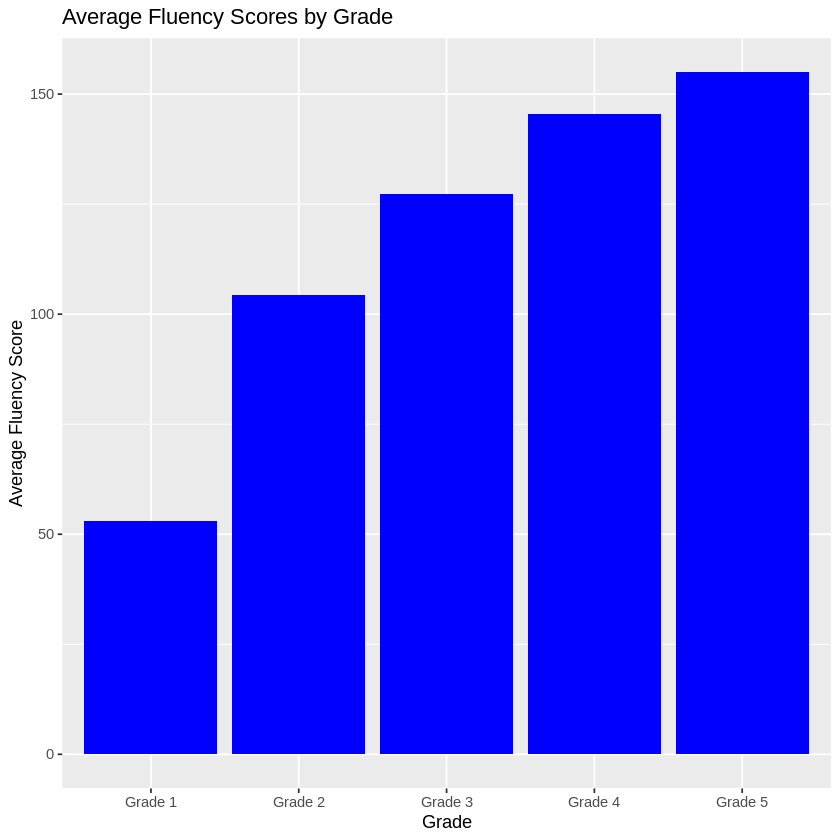

In [ ]:
ggplot(average_fluency_by_grade, aes(x = grade, y = Fluency)) +
   geom_bar(stat = "identity", fill='blue') + labs(title = "Average Fluency Scores by Grade", x = "Grade", y = "Average Fluency Score")


<h2> Regions with the Lowest and Highest Average Fluency Score </h2>

In [ ]:
# Calculate average fluency score by region
average_fluency_by_region <- aggregate(Fluency ~ region, data = final_student_level_df, mean)

In [ ]:
average_fluency_by_region

region,Fluency
<chr>,<dbl>
Bomet,68.44118
Bungoma,144.76892
Busia,113.89706
Eastern,110.16316
Embu,124.83544
Homa bay,122.28859
Isiolo,98.44201
Kajiado,92.56944
Kakamega,105.60656


In [ ]:
#region with lowest fluency score
lowest_fluency_region  = filter(average_fluency_by_region, average_fluency_by_region$Fluency == min(average_fluency_by_region$Fluency) )
#region with the highest fluency score
Highest_fluency_region  = filter(average_fluency_by_region, average_fluency_by_region$Fluency == max(average_fluency_by_region$Fluency) )

In [ ]:
print(lowest_fluency_region)
print(Highest_fluency_region)

     region  Fluency
1 Kirinyaga 60.31395
    region  Fluency
1 Machakos 157.7636


<p>Kirinyaga happens to be the region with the lowest fluency with a value of   60.31395 while Machakos is the region with the Highest fluency with a value of   157.7636 </h3> </p>

<h2> Binary Variable for Low Fluency and Bar Chart </h2>

In [ ]:
head(final_student_level_df, 3)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,lesson_completion_rate
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69,Tana river,Coast,No,0.6878613
40580,7,Grade 2,117,0.9428571,0.9333333,92,86,Kisumu,Nyanza,No,0.8307985
9342,8,Grade 5,144,0.8500000,0.7000000,43,39,Nairobi,Nairobi,No,0.8097166


In [ ]:
# Create a binary variable for fluency score <= 10
final_student_level_df$low_fluency <- ifelse(final_student_level_df$Fluency <= 10, 1, 0)

In [ ]:
head (final_student_level_df, 3)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate,low_fluency
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
35175,1,Grade 1,65,0.9428571,1.0000000,91,69,Tana river,Coast,No,633,0.6878613,0
40580,7,Grade 2,117,0.9428571,0.9333333,92,86,Kisumu,Nyanza,No,613,0.8307985,0
9342,8,Grade 5,144,0.8500000,0.7000000,43,39,Nairobi,Nairobi,No,710,0.8097166,0


In [ ]:
# Calculating the share of pupils scoring under this threshold for each grade
share_low_fluency_by_grade <- aggregate(low_fluency ~ grade,  data =final_student_level_df, mean)

In [ ]:
head(share_low_fluency_by_grade, )

,grade,low_fluency
,<chr>,<dbl>
1,Grade 1,0.110609481
2,Grade 2,0.034351145
3,Grade 3,0.022540984
4,Grade 4,0.016608392
5,Grade 5,0.009137056


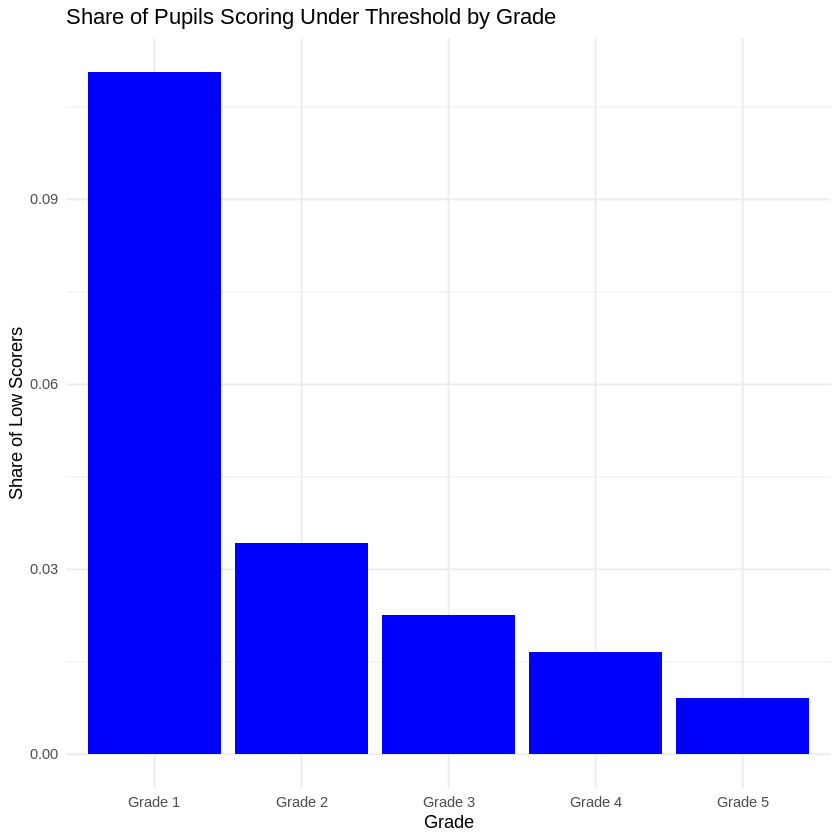

In [ ]:
ggplot(share_low_fluency_by_grade, aes(x = grade, y = low_fluency)) +
   geom_bar(stat = "identity", fill = "blue") +
   theme_minimal() +
   labs(title = "Share of Pupils Scoring Under Threshold by Grade", x = "Grade", y = "Share of Low Scorers")


<h2> 4. School with Highest Share of Low Scorers in Grade 3 </h2>

In [ ]:
# Filtering data for grade 3 alone
grade_3_data <- subset(final_student_level_df, grade == 'Grade 3')

In [ ]:
head(grade_3_data, 5)

school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate,low_fluency
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
792,13,Grade 3,221,0.8571429,0.9666666,104,81,Siaya,Nyanza,No,669,0.8821363,0
230373,16,Grade 3,143,1.0000000,0.7203071,81,65,Mombasa,Coast,Yes,360,0.7744681,0
359640,27,Grade 3,130,1.0000000,0.9189060,97,77,Kiambu,Central,Yes,91,0.5672192,0
9342,42,Grade 3,150,0.8000000,0.9666666,59,50,Nairobi,Nairobi,No,672,0.2473118,0
601798,53,Grade 3,109,1.0000000,0.7902516,99,85,Taita taveta,Coast,Yes,685,0.7955801,0


In [ ]:
# Calculate the share of low scorers by school for grade 3
share_low_fluency_by_school_grade_3 <- aggregate(low_fluency ~ school_id, data = grade_3_data, mean)

In [ ]:
head(share_low_fluency_by_school_grade_3, 5)

,school_id,low_fluency
,<dbl>,<dbl>
1,416,0.1250000
2,792,0.0000000
3,5502,0.0000000
4,7956,0.0000000
5,8084,0.1153846


In [ ]:

# Identify the school with the highest share of low scorers in grade 3
highest_share_low_school_grade_3 <- share_low_fluency_by_school_grade_3[which.max(share_low_fluency_by_school_grade_3$low_fluency), ]

# Print the school ID
print(highest_share_low_school_grade_3)


   school_id low_fluency
56    223941   0.3421053


# <h1>Step 4: Impact Evaluation</h1>

<p> Action Steps : We will </br>
1.   compare the averages of these outcomes between schools that participated in the program and those that did not. </br>
2.   we will explore the relationship between the program and teacher lesson completion rates to see if they confound the effects of the tutoring program. </p>

<h2> 1. Effects on Test Scores and Attendance</h2>
<p>Lets calculate the average effects on math, Kiswahili, fluency scores, and student attendance.</p>

In [ ]:
names(final_student_level_df)

[1] "school_id"              "pupil_id"               "grade"                 
 [4] "Fluency"                "Kiswahili"              "Math"                  
 [7] "attendance_records"     "present_records"        "region"                
[10] "province"               "tutoring_program"       "lesson_completion_rate"
[13] "low_fluency"

In [ ]:
# Aggregate scores and attendance by school and program participation
avg_outcomes_by_program <- aggregate(cbind(Math, Kiswahili, Fluency, attendance_records) ~ tutoring_program + school_id, data = final_student_level_df, mean)

In [ ]:
head (avg_outcomes_by_program)

,tutoring_program,school_id,Math,Kiswahili,Fluency,attendance_records
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No,416,0.6278295,0.5617774,60.31395,79.53488
2,No,792,0.7165333,0.7836571,153.77000,86.46000
3,No,5502,0.7324638,0.7964286,100.33333,86.15942
4,No,7956,0.6412613,0.5277992,50.94595,82.82883
5,No,8084,0.6733755,0.6528029,65.60127,97.94304
6,No,9342,0.7731646,0.7441139,92.79747,84.11392


In [ ]:
# Calculate average effects
effects <- aggregate(cbind(Math, Kiswahili, Fluency, attendance_records) ~ tutoring_program, data = avg_outcomes_by_program, mean)

In [ ]:
# Compare averages between program and non-program schools
print(effects)

  tutoring_program      Math Kiswahili   Fluency attendance_records
1               No 0.7180511 0.6903678  97.88084           81.89300
2              Yes 0.7457785 0.8088320 131.68754           81.60044


<h2>2. Analyzing Lesson Completion Rate</h2>
To examine if the lesson completion rate might confound the relationship between program participation and the outcomes of interest, we will compare lesson completion rates between program and non-program schools and conduct a regression analysis including lesson completion rate as a covariate.

In [ ]:
head(school_information,4)

region,province,school_id,tutoring_program
<chr>,<chr>,<dbl>,<chr>
Mombasa,Coast,136992,No
Kilifi,Coast,687400,Yes
Mombasa,Coast,609982,Yes
Eastern,Eastern,223941,No


In [ ]:
# Compare lesson completion rates
lesson_completion_by_program <- aggregate(lesson_completion_rate ~ tutoring_program, data = final_student_level_df, mean)
print(lesson_completion_by_program)

  tutoring_program lesson_completion_rate
1               No              0.6041153
2              Yes              0.6085406


In [ ]:
colnames(final_student_level_df)

[1] "school_id"              "pupil_id"               "grade"                 
 [4] "Fluency"                "Kiswahili"              "Math"                  
 [7] "attendance_records"     "present_records"        "region"                
[10] "province"               "tutoring_program"       "lesson_completion_rate"
[13] "low_fluency"

In [ ]:
# Regression analysis including lesson completion rate

lm_math <- lm(Math ~ tutoring_program + lesson_completion_rate, data = final_student_level_df)
lm_kiswahili <- lm(Kiswahili ~ tutoring_program + lesson_completion_rate, data = final_student_level_df)
lm_fluency <- lm(Fluency ~ tutoring_program + lesson_completion_rate, data = final_student_level_df)
lm_attendance <- lm(attendance_records ~ tutoring_program + lesson_completion_rate, data = final_student_level_df)

In [ ]:
lm_math


Call:
lm(formula = Math ~ tutoring_program + lesson_completion_rate, 
    data = final_student_level_df)

Coefficients:
           (Intercept)     tutoring_programYes  lesson_completion_rate  
               0.63140                 0.03733                 0.12298  


In [ ]:
# Summarize the regression results
summary(lm_math)
summary(lm_kiswahili)
summary(lm_fluency)
summary(lm_attendance)


Call:
lm(formula = Math ~ tutoring_program + lesson_completion_rate, 
    data = final_student_level_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76050 -0.14325  0.02933  0.19017  0.36814 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.631402   0.006098 103.548   <2e-16 ***
tutoring_programYes    0.037331   0.003995   9.344   <2e-16 ***
lesson_completion_rate 0.122980   0.008907  13.807   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2196 on 12084 degrees of freedom
  (614 observations deleted due to missingness)
Multiple R-squared:  0.02265,	Adjusted R-squared:  0.02249 
F-statistic:   140 on 2 and 12084 DF,  p-value: < 2.2e-16



Call:
lm(formula = Kiswahili ~ tutoring_program + lesson_completion_rate, 
    data = final_student_level_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8188 -0.1275  0.0612  0.1844  0.3505 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.649533   0.006293 103.216  < 2e-16 ***
tutoring_programYes    0.126939   0.004122  30.793  < 2e-16 ***
lesson_completion_rate 0.049367   0.009189   5.372 7.92e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2267 on 12098 degrees of freedom
  (600 observations deleted due to missingness)
Multiple R-squared:  0.07492,	Adjusted R-squared:  0.07477 
F-statistic: 489.9 on 2 and 12098 DF,  p-value: < 2.2e-16



Call:
lm(formula = Fluency ~ tutoring_program + lesson_completion_rate, 
    data = final_student_level_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.52  -55.43  -10.80   49.43  240.96 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             115.759      1.954   59.25   <2e-16 ***
tutoring_programYes      32.763      1.275   25.70   <2e-16 ***
lesson_completion_rate  -30.357      2.839  -10.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69.76 on 11973 degrees of freedom
  (725 observations deleted due to missingness)
Multiple R-squared:  0.06076,	Adjusted R-squared:  0.06061 
F-statistic: 387.3 on 2 and 11973 DF,  p-value: < 2.2e-16



Call:
lm(formula = attendance_records ~ tutoring_program + lesson_completion_rate, 
    data = final_student_level_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.527  -6.835   6.276  12.778  47.762 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             57.5701     0.5337 107.863   <2e-16 ***
tutoring_programYes      0.6681     0.3506   1.905   0.0567 .  
lesson_completion_rate  40.2210     0.7825  51.400   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.76 on 12698 degrees of freedom
Multiple R-squared:  0.1725,	Adjusted R-squared:  0.1724 
F-statistic:  1324 on 2 and 12698 DF,  p-value: < 2.2e-16


# **Result Interpretation: **

**Math Scores**

Tutoring Program Impact : Participation in the tutoring program is associated with an increase in math scores by 0.0373 units, with a p-value of  (p < 2e-16), suggesting a positive impact of the program on math outcomes.
Lesson Completion Rate Impact : Each unit increase in the lesson completion rate is associated with a 0.1230 unit increase in math scores, also a p-value of (p < 2e-16), suggesting that higher lesson completion rates has a positive effect on math scores.

**Kiswahili Scores**

Tutoring Program Impact : There is a significant increase in Kiswahii scores by 0.1269 units with a p-value of (p < 2e-16), indicating a strong and equally positive effect of the tutoring program.
Lesson Completion Rate Impact : for every increase in lesson completion, there is a small yet significant increase with 0.0494 units in Kiswahii scores

**Fluency Scores**

Tutoring Program Impact :  The result shows a substantial positive effect between the tutoring program participation, with an increase in fluency scores by 32.763 units, having a p-value of
(p < 2e-16).

Lesson Completion Rate Impact : Its interesting to observe that for a unit increase in completion rate, there is an associated 30.357 unit reduction in fluency scores, indicating a negative correlation between lesson completion rate and fluency score.

**Attendance Records**

Tutoring Program Impact : The result suggest a slight non-significant  increase of 0.06681 and a p-value of 0.0567 in attendance associated with the tutoring program.

Lesson Completion Rate Impact : The lesson completion rate has a significant positive association with attendance record. For every increase in lesson completion, there is a 40.221 unit increase in attendance records.

# **Overall Interpretation**

Academic Outcomes : The tutoring program has a statistically significant positive impact on math and Kiswahili scores, with a particularly strong effect on fluency scores. This tells us that the tutoring program successfully enhances academic performance in these subjects.
Lesson Completion Rates : The positive association with math and Kiswahili scores and attendance records indicates that lesson completion rates play a crucial role in academic and attendance outcomes.
The negative association with fluency scores is unexpected and should warrants further investigation to understand the underlying reasons.
Attendance : The tutoring program's marginal effect on attendance records suggests that while the program may slightly increase attendance, its primary benefits are observed in academic performance improvements.
